SUBMISSION INSTRUCTIONS

It is recommended that you make a copy of this colab file and then solve the assignment and upload your final notebook on github.

Before uploading your downloaded notebook, RENAME the file as rollno_name.ipynb

Submission Deadline : 18/12/2025 Thursday EOD i.e before 11:59 PM

The deadline is strict and will not be extended, Late submissions are not allowed

Note that you have to upload your solution on the github page of the project Vision Transformer and under Week1

when submitting your pull request on the submission repo keep title as ViT_name_rollno_assgn2

Github Submission repo - https://github.com/electricalengineersiitk/Winter-projects-25-26/tree/main/Vision%20transformer/Week1


#NOTE:
Do not use any pre-built functions from any new libraries apart from numpy, matplot-lib, pandas except for importing datasets.

#### Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.utils import shuffle

# Importing Datasets

Import the MNIST dataset and create X_train, Y_train, and X_test, Y_test.

After importing the dataset you can resize it such that you are dealing with only 1000 images of each number.



In [ ]:
(X_train_full, Y_train_full), (X_test_full, Y_test_full) = mnist.load_data()
X_train_full = np.array(X_train_full)
Y_train_full = np.array(Y_train_full)
X_test_full  = np.array(X_test_full)
Y_test_full  = np.array(Y_test_full)
def select_n_per_class(X, Y, n=1000):
    X_selected = []
    Y_selected = []
    for digit in range(10):
        idx = np.where(Y == digit)[0][:n]
        X_selected.append(X[idx])
        Y_selected.append(Y[idx])
    X_selected = np.concatenate(X_selected, axis=0)
    Y_selected = np.concatenate(Y_selected, axis=0)
    return shuffle(X_selected, Y_selected, random_state=42)
X_train, Y_train = select_n_per_class(X_train_full, Y_train_full, n=1000)
X_test, Y_test   = select_n_per_class(X_test_full, Y_test_full, n=1000)
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape :", X_test.shape)
print("Y_test shape :", Y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
X_train shape: (10000, 28, 28)
Y_train shape: (10000,)
X_test shape : (9786, 28, 28)
Y_test shape : (9786,)


# Model


## Initialize parameters Randomly
$ W_1 = np.random.randn(n_1, n_0) $

$ b_1 = np.zeros((n_1, 1))$

$ W_2 = np.random.randn(n_2, n_1) $

$ b_2 = np.zeros((n_2, 1))$


## Repeat Below Steps for many times :


## Forward Propagation

$ Z_1 = W_1 * X + B_1 $

$ A_1 = f ( Z_1 ) $  

$ Z_2 = W2 * A_1 + B_2 $

$ A_2 = Softmax( Z_2 ) $

## Softmax

$ a_i = \frac{e^{z_i}}{\sum_{i=k}^ne^{z_k}}$


## Cost Function

$Loss = - \sum_{i=k}^{n}[ y_k*log(a_k) ]$

$Cost = - \frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{n}[ y_k*log(a_k) ]$



## Backward Propagation
$dZ_2 = ( A_2 - Y )$

$ dW_2 = \frac{1}{m}. dZ_2 . A_1^T$

$ dB_2 = \frac{1}{m}.sum(dZ_2, 1)$



$dZ_1 = W_2^T . dZ_2 * f_1^|(Z_1) $

$dW_1 = \frac{1}{m}.dZ_1.X^T$

$dB_1 = \frac{1}{m}.sum(dZ_1, 1)$


## Updating Parameters

$ W_2 = W_2 -  \alpha * \frac{\partial Cost }{\partial W_2}$

$ B_2 = B_2 -  \alpha * \frac{\partial Cost }{\partial B_2}$

$ W_1 = W_1 -  \alpha * \frac{\partial Cost }{\partial W_1}$

$ B_1 = B_1 -  \alpha * \frac{\partial Cost }{\partial B_1}$


# Activation Functions

***Now, its your time to implement !***

Complete the below functions for Activations.

In [ ]:
def tanh(x):
    ## Your Code Here ##
    ex = np.exp(x)
    emx = np.exp(-x)
    return (ex - emx) / (ex + emx)
    ## Code Ends ##

In [ ]:
def relu(x):
    ## Your Code Here ##
    return x * (x > 0)
    ## Code Ends ##

In [ ]:
def softmax(z):
    ## Your Code Here ##
    z = z - np.max(z, axis=0, keepdims=True)  # stability
    exp_z = np.exp(z)
    return exp_z / np.sum(exp_z, axis=0, keepdims=True)
    ## Code Ends ##

The function *derivative_tanh* must return the derivative of tanh.
The function *derivative_relu* must return the derivative of ReLU


derivative of tanh is given by 1 - tanh^2(x).


so, derivative_tanh(x):

return 1 - np.power(np.tanh(x), 2)

In [ ]:
def derivative_tanh(x):
    ## Your Code Here ##
    t = tanh(x)
    return 1 - t**2
    ## Code Ends ##

def derivative_relu(x):
    ## Your Code Here ##
    return (x > 0).astype(float)
    ## Code Ends ##

# Initialize Parameters

We need to initialize the **W** parameters randomly, and **B** with zeros

- np.random.randn(a, b) return a numpy array of shape(a, b) with small random values
- For making the values small, we multiply 0.01
- np.zeros(a, b) return a numpy array of shape(a, b) with zeros

### Why need small weights W?
If we initialize weights will large values, then Z = W * X + B, will be large. For functions like tanh and sigmoid, the slope becomes very less for large Z value, thus learning can be very slow.

#### We have an increase in the cost function at the beginning while training the model with ReLU activation function.
It is because our weights were still very large and it was creating problem for training our model.

Multiply weights with 0.001 instead of 0.01, and you will see that the graph becomes normal, with a smooth decrease in cost value.

There are many weight initialization techniques available as well, to solve other such problems.

Now, We need to return a dictionary containing all the parameters.

More about np.random.randn here : https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html

In [ ]:
def initialize_parameters(n_x, n_h, n_y):

    ## Complete the code below ##
    w1 = 0.01 * np.random.randn(n_h, n_x)
    b1 = np.zeros((n_h, 1))
    w2 = 0.01 * np.random.randn(n_y, n_h)
    b2 = np.zeros((n_y, 1))
    ## Your Code ends ##

    parameters = {
        "w1": w1,
        "b1": b1,
        "w2": w2,
        "b2": b2
    }
    return parameters

# Forward Propagation

We need to impletement the following equation for forward propagation :

$ Z_1 = W_1 * X + B_1 $

$ A_1 = f ( Z_1 ) $  

$ Z_2 = W2 * A_1 + B_2 $

$ A_2 = Softmax( Z_2 ) $

For f(x), you can use either tanh or ReLU activation function.

But also use the same for Backpropagation as well

In [ ]:
def forward_prop(x, parameters):

    # To fetch the parameters
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']

    ## Complete the Code below : ##
    z1 = np.dot(w1, x) + b1
    a1 = tanh(z1)          # use relu(z1) if you chose ReLU
    z2 = np.dot(w2, a1) + b2
    a2 = softmax(z2)
    ## Your Code ends ##

    # To return our Zs and As
    forward_cache = {
        "z1": z1,
        "a1": a1,
        "z2": z2,
        "a2": a2
    }

    return forward_cache

# Cost Function

$Loss = - \sum_{k=1}^{n}[ y_k*log(a_k) ]$ .. *for 1 observation*

$Cost = - \frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{n}[ y_k*log(a_k) ]$  .. *for all m observations*

You need to return the cost in the below function

You can use np.sum()
- np.sum(A, axis = 1, keepdims = True) return the column-wise sum for a matrix A
- np.sum(A, axis = 0, keepdims = True) returns the row-wise sum for a matrix A
- np.sum(A) returns the summation of all the elements of A

*keepdims = True keeps the dimenstion in place. In certain cases, the returned sum can be of shape(m,) instead of shape(m, 1).
So, keepdims = True forces it to return the sum in shape(m, 1) instead of shape(m,)*


More about np.sum() here : https://numpy.org/doc/stable/reference/generated/numpy.sum.html

In [ ]:
def cost_function(a2, y):

    ## Your Code Here ##
    m = y.shape[1]
    cost = - (1 / m) * np.sum(y * np.log(a2))
    ## Code Ends ##

    return cost

# Backward Propagation

We need to implement the below equations

$dZ_2 = ( A_2 - Y )$

$ dW_2 = \frac{1}{m}. dZ_2 . A_2^T$

$ dB_2 = \frac{1}{m}.sum(dZ_2, 1)$



$dZ_1 = W_2^T . dZ_2 * f_1^|(Z_1) $

$dW_1 = \frac{1}{m}.dZ_1.A_1^T$

$dB_1 = \frac{1}{m}.sum(dZ_1, 1)$

Helper python functions :
- A.T returns the transpose of matrix A
- np.dot(A, B) returns the matrix multiplication of A and B
- A*B returns the element wise multi-plication for A and B
- np.sum(A, axis = 1, keepdims = True) return the column-wise sum for a matrix A
- np.sum(A, axis = 0, keepdims = True) returns the row-wise sum for a matrix A

In [ ]:
def backward_prop(x, y, parameters, forward_cache):

    m = x.shape[1]

    # Fetching our parameters
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']

    # Fetching our forward_cache
    z1 = forward_cache['z1']
    a1 = forward_cache['a1']
    a2 = forward_cache['a2']

    ## Complete the Code below ##
    dz2 = a2 - y
    dw2 = (1 / m) * np.dot(dz2, a1.T)
    db2 = (1 / m) * np.sum(dz2, axis=1, keepdims=True)

    dz1 = np.dot(w2.T, dz2) * derivative_tanh(z1)
    dw1 = (1 / m) * np.dot(dz1, x.T)
    db1 = (1 / m) * np.sum(dz1, axis=1, keepdims=True)
    ## Your Code ends ##

    gradients = {
        "dw1": dw1,
        "db1": db1,
        "dw2": dw2,
        "db2": db2
    }

    return gradients

# Update Parameters

In [ ]:
def update_parameters(parameters, gradients, learning_rate):

    # Fetching our parameters
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']

    # Fetching our gradients
    dw1 = gradients['dw1']
    db1 = gradients['db1']
    dw2 = gradients['dw2']
    db2 = gradients['db2']

    ## Complete the Code below ##
    w1 = w1 - learning_rate * dw1
    b1 = b1 - learning_rate * db1
    w2 = w2 - learning_rate * dw2
    b2 = b2 - learning_rate * db2
    ## Your code ends ##

    Parameters = {
        "w1": w1,
        "b1": b1,
        "w2": w2,
        "b2": b2
    }

    return Parameters

# Complete Model

Implement the entire Neural Network here

### Instructions :

We need to initialize parameters once, and after that, we will run the following in a loop:
- forward_prop(x, parameters)
- cost_function(a2, y)
- backward_prop(x, y, parameters, forward_cache)
- parameters = update_parameters(parameters, gradients, learning_rate)

### Return :
- parameters, which will be our trained parameters
- cost_list, which contains cost for every iterations.

In [ ]:
def model(x, y, n_h, learning_rate, iterations):

    ## Complete the Code Below ##
    n_x = x.shape[0]      # number of input features
    n_y = y.shape[0]      # number of output classes
    ## Your Code ends ##

    cost_list = []

    ## Complete the Code Below ##
    parameters = initialize_parameters(n_x, n_h, n_y)
    ## Your Code ends ##

    ## Complete the Code Below ##
    for i in range(iterations):

        # Forward Propagation
        forward_cache = forward_prop(x, parameters)

        # Cost Function
        cost = cost_function(forward_cache['a2'], y)

        # Backward propagation
        gradients = backward_prop(x, y, parameters, forward_cache)

        # Update Parameters
        parameters = update_parameters(parameters, gradients, learning_rate)

        cost_list.append(cost)

        if i % (iterations // 10) == 0:
            print("cost after", i, "iters is", cost)

    ## Your Code ends ##

    return parameters, cost_list

In [ ]:
X = X_train.reshape(X_train.shape[0], -1).T
Y = np.eye(10)[Y_train].T

In [ ]:
## Complete the Code Below ##

n_h =64
learning_rate =0.01
iterations =1000

## Your Code ends ##

Parameters, Cost_list = model(X, Y, n_h = n_h, learning_rate = learning_rate, iterations = iterations)

cost after 0 iters is 2.3004280983140353
cost after 100 iters is 0.974901871534778
cost after 200 iters is 0.534517719995276
cost after 300 iters is 0.3873043516064655
cost after 400 iters is 0.30788811170478275
cost after 500 iters is 0.26996770400705755
cost after 600 iters is 0.22490114385197044
cost after 700 iters is 0.20043055301837295
cost after 800 iters is 0.18248889423867778
cost after 900 iters is 0.165225338668845


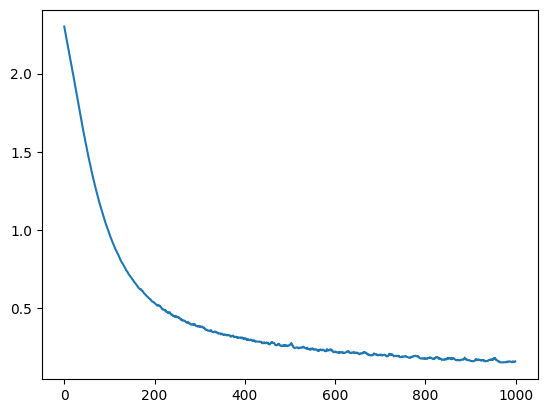

In [ ]:
t = np.arange(0, iterations)
plt.plot(t, Cost_list)
plt.show()

# Checking Accuracy

Run the below cells to check your model Accuracy

In [ ]:
def accuracy(inp, labels, parameters):
    forward_cache = forward_prop(inp, parameters)
    a_out = forward_cache['a2']   # containes propabilities with shape(10, 1)

    a_out = np.argmax(a_out, 0)  # 0 represents row wise

    labels = np.argmax(labels, 0)

    acc = np.mean(a_out == labels)*100

    return acc

In [ ]:
X_train_acc = X_train.reshape(X_train.shape[0], -1).T
Y_train_acc = np.eye(10)[Y_train].T
X_test_acc = X_test.reshape(X_test.shape[0], -1).T
Y_test_acc = np.eye(10)[Y_test].T

In [22]:
print("Accuracy of Train Dataset", accuracy(X_train_acc, Y_train_acc, Parameters), "%")
print("Accuracy of Test Dataset", round(accuracy(X_test_acc, Y_test_acc, Parameters), 2), "%")

Accuracy of Train Dataset 96.50999999999999 %
Accuracy of Test Dataset 90.87 %


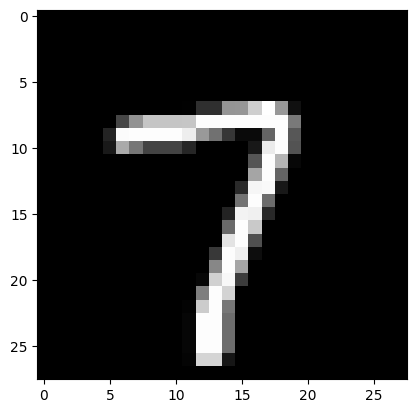

Our model says it is: 7
Actual label is: 7


In [25]:
import random
idx = np.random.randint(0, X_test_acc.shape[1])
plt.imshow(X_test[idx], cmap='gray')
plt.show()
x_single = X_test_acc[:, idx].reshape(-1, 1)
cache = forward_prop(x_single, Parameters)
a_pred = np.argmax(cache['a2'], axis=0)
print("Our model says it is:", a_pred[0])
print("Actual label is:", Y_test[idx])